In [1]:
import json
import pyhf
from plot_classes_copy import *

In [2]:
with open("bkg_only.json") as serialized:
    spec = json.load(serialized)

workspace = pyhf.Workspace(spec)
model = workspace.model(poi_name=None)  # background-only!
data = workspace.data(model)

In [3]:
pyhf.set_backend("numpy", "minuit") # use minuit instead of scipy_optimize
pyhf.set_backend(pyhf.tensorlib, pyhf.optimize.minuit_optimizer(tolerance=1e-3)) # change tolerance

In [4]:
result = pyhf.infer.mle.fit(data, model, return_uncertainties=True)
bestfit, errors = result.T

pulls = pyhf.tensorlib.concatenate(
    [
        (bestfit[model.config.par_slice(k)] - model.config.param_set(k).suggested_init)
        / model.config.param_set(k).width()
        for k in model.config.par_order
        if model.config.param_set(k).constrained
    ]
)

pullerr = pyhf.tensorlib.concatenate(
    [
        errors[model.config.par_slice(k)] / model.config.param_set(k).width()
        for k in model.config.par_order
        if model.config.param_set(k).constrained
    ]
)

labels = np.asarray(
    [
        f"{k}[{i}]" if model.config.param_set(k).n_parameters > 1 else k
        for k in model.config.par_order
        if model.config.param_set(k).constrained
        for i in range(model.config.param_set(k).n_parameters)
    ]
)

In [5]:
_order = np.argsort(errors)
bestfit = bestfit[_order]
errors = errors[_order]
labels = labels[_order]
pulls = pulls[_order]
pullerr = pullerr[_order]

In [6]:
data = pd.DataFrame(pulls)
data[1] = data[2] = pullerr
data.index = labels
data.columns = [1, 2, 3]
data

,1,2,3
JER_EffectiveNP_1,-0.214847,0.632227,0.632227
JER_EffectiveNP_3,0.206437,0.672134,0.672134
JER_EffectiveNP_2,0.294766,0.720843,0.720843
JER_EffectiveNP_7,-0.097732,0.811616,0.811616
JER_EffectiveNP_12restTerm,0.030237,0.875108,0.875108
JER_EffectiveNP_10,-0.136128,0.931211,0.931211
JER_EffectiveNP_4,0.068021,0.939272,0.939272
JER_EffectiveNP_5,-0.461401,0.960214,0.960214
EG_SCALE_ALL,-0.238039,0.969967,0.969967
JER_EffectiveNP_8,0.020320,0.974938,0.974938


JER_EffectiveNP_1             0.632227
JER_EffectiveNP_3             0.672134
JER_EffectiveNP_2             0.720843
JER_EffectiveNP_7             0.811616
JER_EffectiveNP_12restTerm    0.875108
JER_EffectiveNP_10            0.931211
JER_EffectiveNP_4             0.939272
JER_EffectiveNP_5             0.960214
EG_SCALE_ALL                  0.969967
JER_EffectiveNP_8             0.974938
EG_Iso                        0.979230
EG_Eff                        0.988341
JER_EffectiveNP_11            0.990575
EG_Reco                       0.992768
EG_SCALE_AF2                  0.993347
JER_EffectiveNP_6             0.995973
EG_RESOLUTION_ALL             1.088492
JER_DataVsMC                  1.204680
JER_EffectiveNP_9             1.234753
Name: 2, dtype: float64
   JER_EffectiveNP_1  JER_EffectiveNP_3  JER_EffectiveNP_2  JER_EffectiveNP_7  \
3          -0.632227          -0.672134          -0.720843          -0.811616   
2           0.632227           0.672134           0.720843           0.81

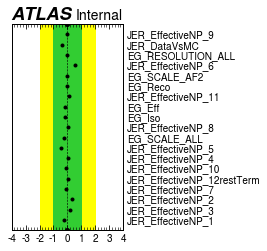

In [7]:
plot = PullPlot(data)
plot.plot_options(center=0)
plot.create()